In [1]:
from scipy.stats import wasserstein_distance


In [3]:
one_class = wasserstein_distance([1,3,30,1,1,0,0,0,0,0],[0,0,36,0,0,0,0,0,0,0],[2,1,0,1,2,3,4,5,6,7],[2,1,0,1,2,3,4,5,6,7])
c1 = str(one_class)
print(f"EMD for Class 1 = " + c1)
one_class_t2 = wasserstein_distance([0,1,1,25,2,1,0,0,0,0],[0,0,0,30,0,0,0,0,0,0],[3,2,1,0,1,2,3,4,5,6],[3,2,1,0,1,2,3,4,5,67])
c2 = str(one_class_t2)
print(f"EMD for Class 2 = " + c2)
mean_class = (one_class + one_class_t2) / 2
mean_class = str(mean_class)
print(f"Mean EMD for two classes is = " + mean_class)
multi_class_t2 = wasserstein_distance([1,3,30,1,1,0,0,0,0,0,0,1,1,25,2,1,0,0,0,0],[0,0,36,0,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0],
                                    [2,1,0,1,2,3,4,5,6,7,3,2,1,0,1,2,3,4,5,6],[2,1,0,1,2,3,4,5,6,7,3,2,1,0,1,2,3,4,5,6])
multi_class_t2 = str(multi_class_t2)
print(f"Multi class EMD = " + multi_class_t2)

EMD for Class 1 = 0.25806451612903225
EMD for Class 2 = 0.2592592592592593
Mean EMD for two classes is = 0.2586618876941458
Multi class EMD = 0.2586206896551724


In [4]:
whole_matrix = wasserstein_distance([15,1,1,0,0,0,0,0,0,0,5,8,4,0,0,0,0,0,0,0,5,5,18,1,0,0,1,0,0,0,0,1,3,10,2,1,0,0,0,1,0,0,0,0,15,0,0,0,0,0,0,0,0,0,3,14,2,1,0,0,0,0,0,0,0,5,4,6,1,0,0,0,0,0,0,2,0,37,1,0,0,0,0,0,0,0,0,3,13,3,0,0,0,0,0,0,0,0,1,25],
                                    [17,0,0,0,0,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,0,18,0,0,0,0,0,0,0,0,0,0,15,0,0,0,0,0,0,0,0,0,0,20,0,0,0,0,0,0,0,0,0,0,16,0,0,0,0,0,0,0,0,0,0,38,0,0,0,0,0,0,0,0,0,0,19,0,0,0,0,0,0,0,0,0,0,26],
                                    [0,1,2,3,4,5,6,7,8,9,1,0,1,2,3,4,5,6,7,8,2,1,0,1,2,3,4,5,6,7,3,2,1,0,1,2,3,4,5,6,4,3,2,1,0,1,2,3,4,5,5,4,3,2,1,0,1,2,3,4,6,5,4,3,2,1,0,1,2,3,7,6,5,4,3,2,1,0,1,2,8,7,6,5,4,3,2,1,0,1,9,8,7,6,5,4,3,2,1,0],
                                    [0,1,2,3,4,5,6,7,8,9,1,0,1,2,3,4,5,6,7,8,2,1,0,1,2,3,4,5,6,7,3,2,1,0,1,2,3,4,5,6,4,3,2,1,0,1,2,3,4,5,5,4,3,2,1,0,1,2,3,4,6,5,4,3,2,1,0,1,2,3,7,6,5,4,3,2,1,0,1,2,8,7,6,5,4,3,2,1,0,1,9,8,7,6,5,4,3,2,1,0])
whole_matrix = str(whole_matrix)
print("EMD for the Confusion Matrix is " + whole_matrix)

EMD for the Confusion Matrix is 0.23939393939393938


In [1]:
import matplotlib.pyplot as p
import matplotlib.colors as colors
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
import argparse
import seaborn as sns
from statistics import mean

class_assignment = "classifier_ranges.tsv"
#Set class values (probably better to read in a file instead of hard code)
classes = pd.read_csv(class_assignment, delimiter='\t')
class_list = []

for c in classes['Class_Ranges']:
    print(c)
    class_list.append(c)
    print(class_list)

hex_list = []
i = 0
k=0
for waves in class_list:
    if i+1 != len(class_list):

        gamma = 0.8
        intensity_max = 1

        wave = float(mean([class_list[i],class_list[i+1]]))
        i+=1
        print(wave)
        if wave>= 380 and wave<= 440:
            attenuation = 0.3 + (0.7 * (wave- 380) / (440 - 380))
            R = ((-(wave- 440) / (440 - 380)) * attenuation) ** gamma
            G = 0.0
            B = (1.0 * attenuation) ** gamma
        elif wave>= 440 and wave<= 490:
            R = 0.0
            G = ((wave- 440) / (490 - 440)) ** gamma
            B = 1.0
        elif wave>= 490 and wave<= 510:
            R = 0.0
            G = 1.0
            B = (-(wave- 510) / (510 - 490)) ** gamma
        elif wave>= 510 and wave<= 580:
            R = ((wave- 510) / (580 - 510)) ** gamma
            G = 1.0
            B = 0.0
        elif wave>= 580 and wave<= 645:
            R = 1.0
            G = (-(wave- 645) / (645 - 580)) ** gamma
            B = 0.0
        elif wave>= 645 and wave<= 750:
            attenuation = 0.3 + 0.7 * (750 - wave) / (750 - 645)
            R = (1.0 * attenuation) ** gamma
            G = 0.0
            B = 0.0
        else:
            R = 0.0
            G = 0.0
            B = 0.0

        color = (int(R)*255, int(G)*255, int(B)*255)
        print(color)
        hex = colors.rgb2hex(color, keep_alpha=True)
        print(hex)
        hex_list.append(hex)
        
    else: 
         pass
print(hex_list)

340
[340]
360
[340, 360]
380
[340, 360, 380]
420
[340, 360, 380, 420]
450
[340, 360, 380, 420, 450]
480
[340, 360, 380, 420, 450, 480]
490
[340, 360, 380, 420, 450, 480, 490]
495
[340, 360, 380, 420, 450, 480, 490, 495]
505
[340, 360, 380, 420, 450, 480, 490, 495, 505]
520
[340, 360, 380, 420, 450, 480, 490, 495, 505, 520]
560
[340, 360, 380, 420, 450, 480, 490, 495, 505, 520, 560]
350.0
(0, 0, 0)
#000000ff
370.0
(0, 0, 0)
#000000ff
400.0
(0, 0, 0)
#000000ff
435.0
(0, 0, 0)
#000000ff
465.0
(0, 0, 255)


ValueError: RGBA values should be within 0-1 range

#000000ff
#000000ff
#000000ff
#000000ff
#0000ffff
#0000ffff
#00ff00ff
#00ff00ff
#00ff00ff
#00ff00ff


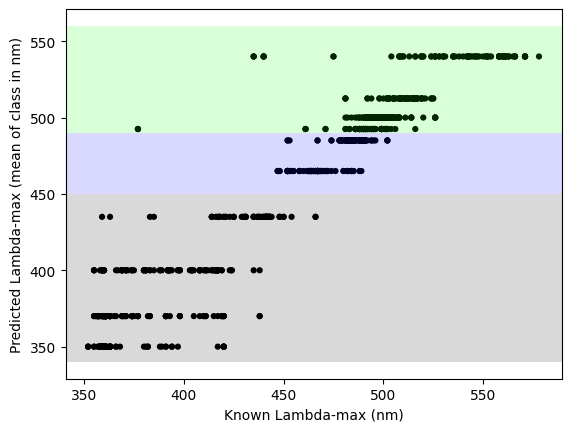

In [31]:


file = "wds_classifier_test_results_t2.csv"
outfile = "test"

#have it parse through the file and assign number of classes, adding the numbers to a list. 

#Used a calculator to get hex color from wave
#https://academo.org/demos/wavelength-to-colour-relationship/
class0col = '#0f0f0f'	#350 is UV so using grey 
class1col = '#0f0f0f'	#370 is UV so using grey
class2col = '#8300b5'	#400
class3col = '#2300ff'	#435
class4col = '#0092ff'	#465
class5col = '#00eaff'	#485
class6col = '#00ffe0'	#493
class7col = '#00ff92'	#500
class8col = '#15ff00'	#513
class9col = '#70ff00'	#535

#Read data
table = pd.read_csv(file, delimiter = ',')

#Duplicate predicted class next to change to actual lmax 
table['Predicted_lmax'] = table.loc[:, 'Predicted_Class']
i = 0
for colors in class_list:
#Convert class values to median lambda max value of that class in new column
    if i+1 != len(class_list):
        table['Predicted_lmax'] = table['Predicted_lmax'].replace(i,mean([class_list[i],class_list[i+1]]))
        i+=1
    else: 
        pass


colorby='Score'

#2d
sns.scatterplot(x='Lambda_Max', y='Predicted_lmax', data=table, edgecolor = 'none', color = 'black', s = 20)
plt.xlabel('Known Lambda-max (nm)')
plt.ylabel('Predicted Lambda-max (mean of class in nm)')

i = 0
alpha = 0.05
for wavelengths in class_list:
    if i+1 <= len(hex_list):
        print(hex_list[i])
        plt.axhspan(class_list[i],class_list[i+1], facecolor=hex_list[i], alpha=0.15)
        i+=1
    else: 
        pass
    #place colored bands behind plot


#If no file name show on screen otherwise save pdf
if outfile == '' :
    plt.show()
else:
    fileout = outfile + '.pdf'
    plt.savefig(fileout)
